In [51]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import os

In [52]:
df = pd.read_csv(r"C:\Users\abhis\Desktop\program\AICTE_Edunet_Internship\Week_1\data\Wind_Power_Normalized.csv")

In [53]:
df.head()

,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power,Location,Ordinal_Time,Year,Month,Day,Hour,Minute
0,-0.824797,0.856757,-0.574031,0.077712,0.051240,0.403900,0.450000,0.031359,0.1635,1,736331,2017,1,2,0,0
1,-0.829340,0.914472,-0.564477,0.111171,0.162261,0.417827,0.438889,0.135889,0.1424,1,736331,2017,1,2,1,0
2,-0.902026,1.203045,-0.574031,0.070157,0.113054,0.409471,0.416667,0.094077,0.1214,1,736331,2017,1,2,2,0
3,-0.874768,1.029901,-0.583585,0.070157,0.109394,0.158774,0.291667,0.038328,0.1003,1,736331,2017,1,2,3,0
4,-0.879311,1.029901,-0.593139,0.133297,0.180155,0.158774,0.233333,0.121951,0.0793,1,736331,2017,1,2,4,0


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175200 entries, 0 to 175199
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   temperature_2m       175200 non-null  float64
 1   relativehumidity_2m  175200 non-null  float64
 2   dewpoint_2m          175200 non-null  float64
 3   windspeed_10m        175200 non-null  float64
 4   windspeed_100m       175200 non-null  float64
 5   winddirection_10m    175200 non-null  float64
 6   winddirection_100m   175200 non-null  float64
 7   windgusts_10m        175200 non-null  float64
 8   Power                175200 non-null  float64
 9   Location             175200 non-null  int64  
 10  Ordinal_Time         175200 non-null  int64  
 11  Year                 175200 non-null  int64  
 12  Month                175200 non-null  int64  
 13  Day                  175200 non-null  int64  
 14  Hour                 175200 non-null  int64  
 15  Minute           

### **Key points** :
* there is **not any null values**.
* there is **not any missng values** in dataframe.
* there is **no categorical column** to encode it.
* **power** is float type
*  four Location is given.

### checking for Unique value in different columns

In [55]:
print("Year",np.unique(df.Year))
print("Month",np.unique(df.Month))
print("Day",np.unique(df.Day))
print("Hour",np.unique(df.Hour))
print("Minute",np.unique(df.Minute))

Year [2017 2018 2019 2020 2021]
Month [ 1  2  3  4  5  6  7  8  9 10 11 12]
Day [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]
Hour [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Minute [0]


**Key Note**
1. remove the Minute column that is not necessary in it. it has same value all over in rows..

In [56]:
df = df.drop('Minute',axis=1)

In [59]:
df_copy=  df.copy()

### How the power value varies with over the year and month 

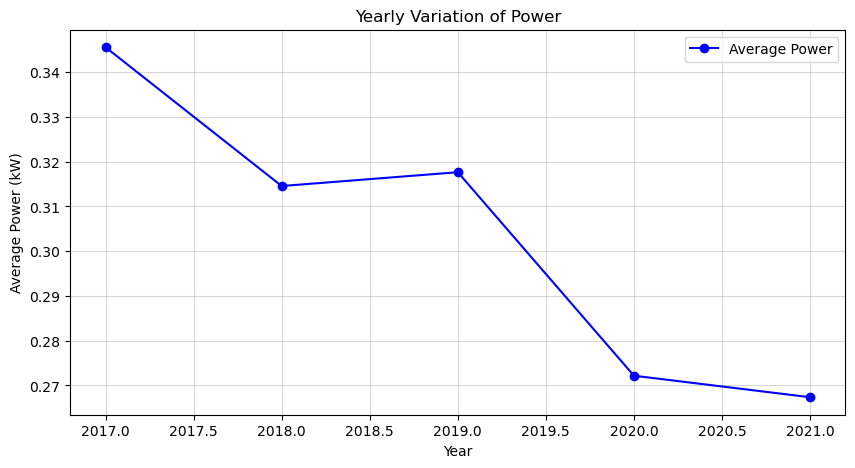

In [60]:
# Group by year and calculate mean power
power_by_year = df.groupby("Year")["Power"].mean()

# Plot
plt.figure(figsize=(10, 5))
plt.plot(power_by_year.index, power_by_year.values, marker='o', color='blue', label="Average Power")
plt.xlabel("Year")
plt.ylabel("Average Power (kW)")
plt.title("Yearly Variation of Power")
plt.grid(alpha=0.5)
plt.legend()
plt.show()

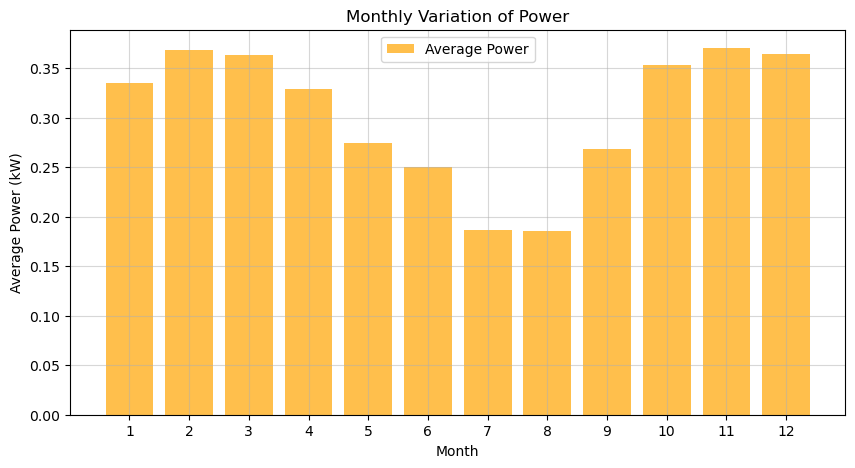

In [61]:
# Group by month and calculate mean power
power_by_month = df.groupby('Month')['Power'].mean()

# Plot
plt.figure(figsize=(10, 5))
plt.bar(power_by_month.index, power_by_month.values, color='orange', alpha=0.7, label="Average Power")
plt.xlabel("Month")
plt.ylabel("Average Power (kW)")
plt.title("Monthly Variation of Power")
plt.xticks(range(1, 13))  # Months from 1 to 12
plt.grid(alpha=0.5)
plt.legend()
plt.show()

### How the Power varies with in  Year's !! 

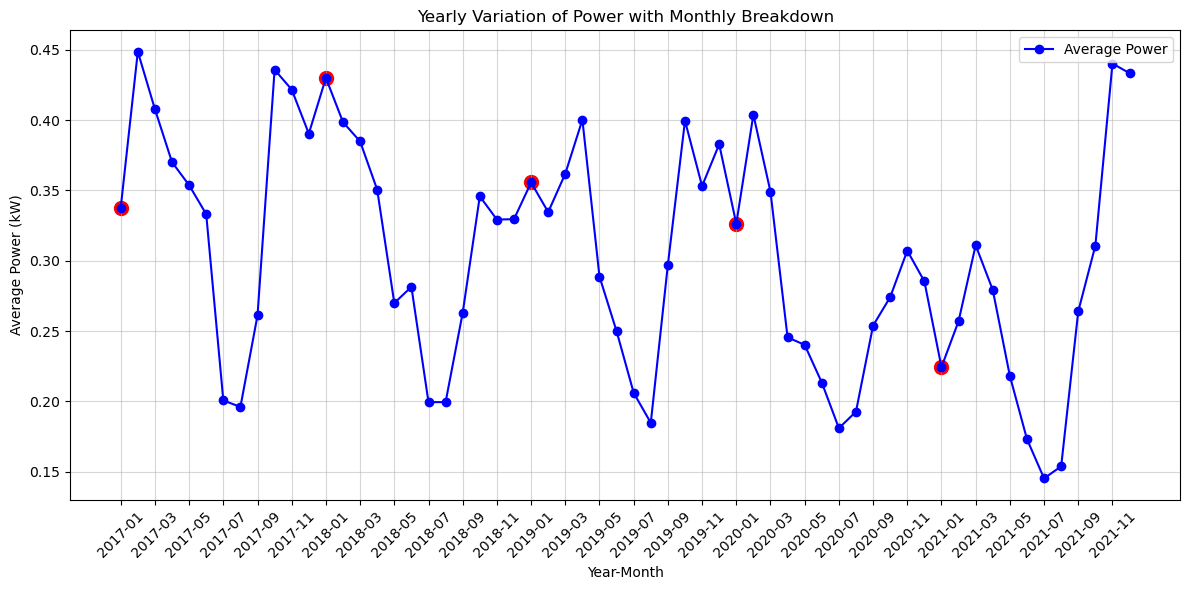

In [62]:
# Updated Plot Code
plt.figure(figsize=(12, 6))

# Plot the full series
plt.plot(power_by_year_month.index, power_by_year_month.values, marker='o', color='blue', label="Average Power")

# Highlight the first month of each year
for idx, label in enumerate(power_by_year_month.index):
    if label.endswith("-01"):  # Check if it's the first month of the year
        plt.scatter(idx, power_by_year_month.values[idx], color='red', s=100)  # Bigger marker, different color

# Customize ticks
plt.xticks(ticks=range(0, len(power_by_year_month.index), 2),  # Show every 2nd label for readability
           labels=power_by_year_month.index[::2], rotation=45)

# Add labels and title
plt.xlabel("Year-Month")
plt.ylabel("Average Power (kW)")
plt.title("Yearly Variation of Power with Monthly Breakdown")
plt.grid(alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

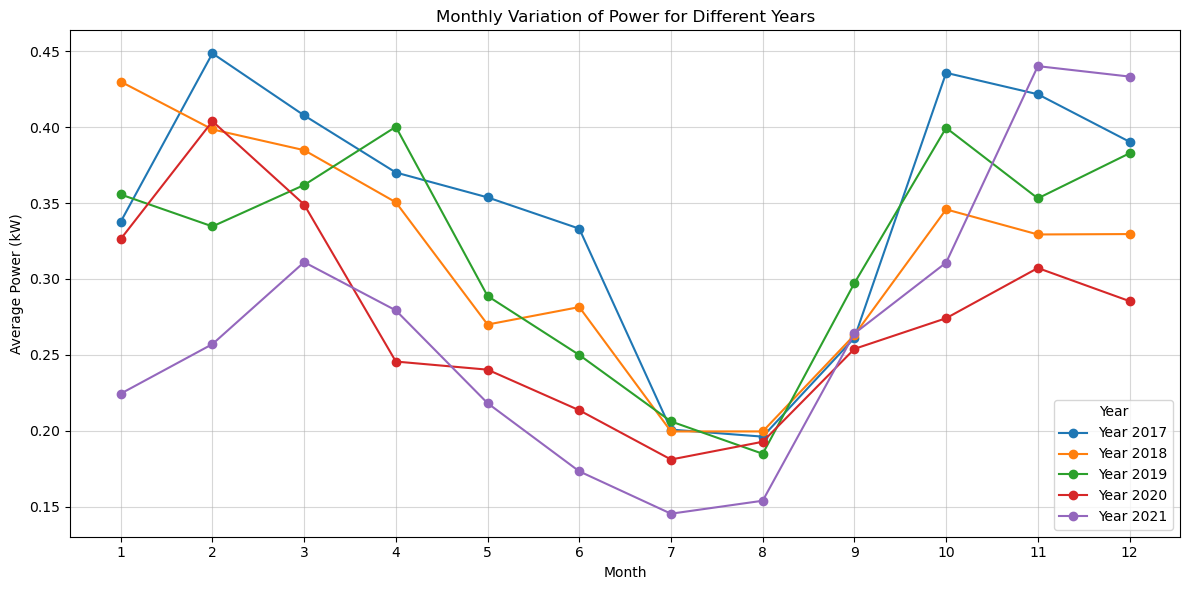

In [63]:

# Group data by Year and Month, calculate the mean Power
power_monthly = df.groupby(["Year", "Month"])["Power"].mean().reset_index()

# Plot each year's monthly variation
plt.figure(figsize=(12, 6))

for year in sorted(power_monthly["Year"].unique()):
    year_data = power_monthly[power_monthly["Year"] == year]
    plt.plot(year_data["Month"], year_data["Power"], marker='o', label=f"Year {year}")

# Customize the legend to appear at the bottom-right corner
plt.legend(title="Year", loc="lower right")  # Moves the legend to the bottom-right
plt.xticks(range(1, 13))  # Months from 1 to 12
plt.xlabel("Month")
plt.ylabel("Average Power (kW)")
plt.title("Monthly Variation of Power for Different Years")
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()


### **Key Notes**
* over the year **Total Power Genration Decrease** .
* **Power Genration** is least in **6th-8th Month**.
* **Max Power Genration** in span of **1st-4th and 10th-12th Month**. (Most suitable month to genration power..)
* **General Trends** from  **3rd-7th Power genration decrease** and  **8th-10th it will increase**.